In [14]:
import xarray as xr
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [10, 8]
import seaborn as sns
import sys, os
from sklearn.metrics import mean_squared_error

# Local Imports
curdir = os.getcwd()
print(curdir)
sys.path.insert(0, curdir+"/../../Functions")
# My built function imports
from data_functions import *
from plotting_functions import *

/Users/mawa7160/Library/CloudStorage/OneDrive-UCB-O365/Documents/GitHub/Hemispheric-Albedo-Project/Examples/Syn_Data


In [15]:
first_half_file_name = "/Users/mawa7160/dev/data/CERES/SYN/1deg-000301-200325.nc"
ds = xr.open_dataset(first_half_file_name)
part_2_name = "/Users/mawa7160/dev/data/CERES/SYN/1deg-200326-220331.nc"
ds_2 = xr.open_dataset(part_2_name)

full_years = xr.concat([ds,ds_2], "time")

specific_yearly_dat = full_years["toa_solar_all_daily"]
cleaned_yearly_dat = pick_CERES_data(specific_yearly_dat, "2001", "01", "2022", "01")

yr_avgs = take_yearly_average_from_daily_data(cleaned_yearly_dat, "2001", "2021")

Text(0.5, 1.0, 'SYN Daily Data Yearly Averaged with 365.25 Days - Jan Start')

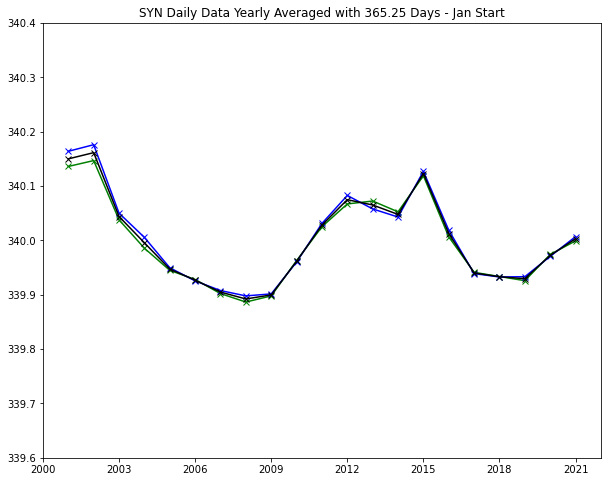

In [16]:
plt.plot(yr_avgs.years, yr_avgs["nh"], "gx-")
plt.plot(yr_avgs.years, yr_avgs["sh"], "bx-")
plt.plot(yr_avgs.years, yr_avgs["global"], "kx-")
plt.ylim([339.6, 340.4])
plt.xticks([2000, 2003, 2006, 2009, 2012, 2015, 2018, 2021])
plt.title("SYN Daily Data Yearly Averaged with 365.25 Days - Jan Start")

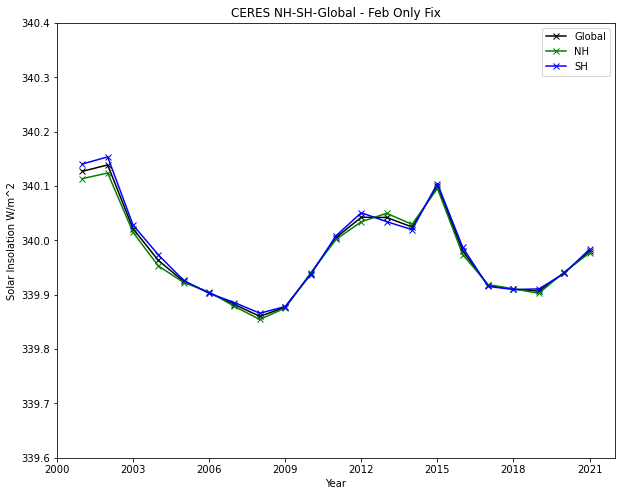

In [17]:
file_name = "/Users/mawa7160/dev/data/CERES/EBAF/CERES_EBAF-TOA_Full_2022_01.nc"
ceres_ds = xr.open_dataset(file_name)
ceres_full_years = ceres_ds
solar_in = create_CERES_hemisphere_data(ceres_full_years, "solar_mon", start_yr="2001", start_mon="01", 
    end_yr="2022", end_mon="01", remove_leap_year=1)
plot_hemisphere_and_global_by_year(solar_in, solar_in.year, title="CERES NH-SH-Global - Feb Only Fix", fixed_ylim=True, set_x_ticks=True)

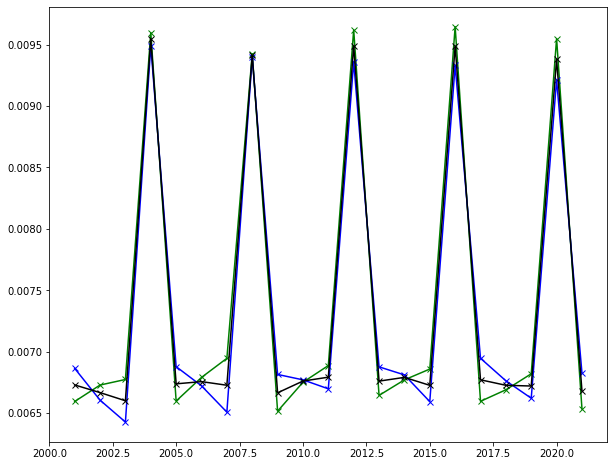

In [32]:
# Plotting the difference
nh_diff_percent = np.abs(yr_avgs["nh"].data-solar_in["nh"].data)/np.average(yr_avgs["nh"])*100
sh_diff_percent = np.abs(yr_avgs["sh"].data-solar_in["sh"].data)/np.average(yr_avgs["sh"])*100
global_diff_percent = np.abs(yr_avgs["global"].data-solar_in["global"].data)/np.average(yr_avgs["global"])*100

plt.plot(yr_avgs.years, nh_diff_percent, "gx-", label="NH")
plt.plot(yr_avgs.years, sh_diff_percent, "bx-", label="SH")
plt.plot(yr_avgs.years, global_diff_percent, "kx-", label="Global")